## Importing the Data 
------

In [1]:
import csv
location = 'NCAA_2017_projections.txt'
with open(location,'rU') as r:
    reader = csv.reader(r,delimiter='\n')
    data = [i for i in reader]
r.close()
print(data[:10])

[['School'], ['CBS Sports'], ['Yahoo!'], ['538'], ['ESPN'], ['Pomeroy'], ['Sagarin'], ['1 Villanova'], ['>99%'], ['99%']]


In [2]:
header = [data[:7]]
header = sum(header,[])
print(header)

[['School'], ['CBS Sports'], ['Yahoo!'], ['538'], ['ESPN'], ['Pomeroy'], ['Sagarin']]


In [3]:
data = data[7:]
print(data[:10])

[['1 Villanova'], ['>99%'], ['99%'], ['99%'], ['99%'], ['97%'], ['99%'], ['1 Gonzaga'], ['99%'], ['96%']]


In [4]:
# initially did this later, but it makes more sense here
import re

In [5]:
f_data = sum(data, []) # Converts the list of lists to a list of strings, really useful

In [6]:
f_data = [x.replace('>',"") for x in f_data]
f_data = [x.replace('<','') for x in f_data]
f_data = [x.replace('%',"") for x in f_data]
# replace is my new favorite builtin function
print(f_data[:25])

['1 Villanova', '99', '99', '99', '99', '97', '99', '1 Gonzaga', '99', '96', '98', '98', '99', '99', '1 North Carolina', '99', '95', '98', '98', '98', '99', '1 Kansas', '99', '96', '98']


In [7]:
# This piece creates a separate list for each school and adds to rows
i=0
rows = []
while i<len(f_data): 
    rows.append(f_data[i:i+7]) # there are seven entries for each that are separated by a comma
    i+=7
print(rows[:5])

[['1 Villanova', '99', '99', '99', '99', '97', '99'], ['1 Gonzaga', '99', '96', '98', '98', '99', '99'], ['1 North Carolina', '99', '95', '98', '98', '98', '99'], ['1 Kansas', '99', '96', '98', '97', '95', '98'], ['2 Duke', '99', '96', '97', '95', '92', '97']]


>Now I have a list of lists, and should be able to set up a couple other variables I'll need

## Adding analysis variables
-----

In [8]:
schools = [i[:1] for i in rows]
# print schools

In [9]:
seed = []
str_schools = sum(schools,[])
for i in str_schools:
    seed1 = i[0]
    seed2 = i[1]
    if seed2 == '':
        seed.append(seed1)
    elif seed2 != '':
        seed.append(seed1+seed2)
    seed = [int(i) for i in seed]

print seed

[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16]


In [10]:
school_name = [i[2:] for i in str_schools]
school_names = []
for i in school_name:
    if i[0]==' ':
        i = i[1:len(i)] # Couldn't seem to just redeclare the variable
        school_names.append(i) # This is a long way to do this, but I weirdly had trouble here
    else:
        school_names.append(i)
print school_names

['Villanova', 'Gonzaga', 'North Carolina', 'Kansas', 'Duke', 'Kentucky', 'Arizona', 'Louisville', 'Baylor', 'Florida State', 'Oregon', 'U.C.L.A.', 'Purdue', 'Butler', 'West Virginia', 'Florida', 'Virginia', 'Iowa State', 'Notre Dame', 'Minnesota', 'Cincinnati', 'S.M.U.', 'Creighton', 'Maryland', "Saint Mary's", 'Michigan', 'Dayton', 'South Carolina', 'Arkansas', 'Northwestern', 'Miami', 'Wisconsin', 'Seton Hall', 'Michigan State', 'Vanderbilt', 'Virginia Tech', 'Virginia Commonwealth', 'Marquette', 'Oklahoma State', 'Wichita State', 'Xavier', 'Providence / U.S.C.', 'Kansas State / Wake Forest', 'Rhode Island', 'U.N.C. Wilmington', 'Nevada', 'Middle Tennessee', 'Princeton', 'East Tennessee State', 'Vermont', 'Bucknell', 'Winthrop', 'Iona', 'New Mexico State', 'Florida Gulf Coast', 'Kent State', 'North Dakota', 'Jacksonville State', 'Northern Kentucky', 'Troy', 'South Dakota State', 'Texas Southern', "Mt. Saint Mary's / New Orleans", 'N.C. Central / U.C. Davis']


In [11]:
seed_school = zip(seed,school_name)
print seed_school,

[(1, 'Villanova'), (1, 'Gonzaga'), (1, 'North Carolina'), (1, 'Kansas'), (2, 'Duke'), (2, 'Kentucky'), (2, 'Arizona'), (2, 'Louisville'), (3, 'Baylor'), (3, 'Florida State'), (3, 'Oregon'), (3, 'U.C.L.A.'), (4, 'Purdue'), (4, 'Butler'), (4, 'West Virginia'), (4, 'Florida'), (5, 'Virginia'), (5, 'Iowa State'), (5, 'Notre Dame'), (5, 'Minnesota'), (6, 'Cincinnati'), (6, 'S.M.U.'), (6, 'Creighton'), (6, 'Maryland'), (7, "Saint Mary's"), (7, 'Michigan'), (7, 'Dayton'), (7, 'South Carolina'), (8, 'Arkansas'), (8, 'Northwestern'), (8, 'Miami'), (8, 'Wisconsin'), (9, 'Seton Hall'), (9, 'Michigan State'), (9, 'Vanderbilt'), (9, 'Virginia Tech'), (10, ' Virginia Commonwealth'), (10, ' Marquette'), (10, ' Oklahoma State'), (10, ' Wichita State'), (11, ' Xavier'), (11, ' Providence / U.S.C.'), (11, ' Kansas State / Wake Forest'), (11, ' Rhode Island'), (12, ' U.N.C. Wilmington'), (12, ' Nevada'), (12, ' Middle Tennessee'), (12, ' Princeton'), (13, ' East Tennessee State'), (13, ' Vermont'), (13, 

In [12]:
for i in rows:
    print i
        

['1 Villanova', '99', '99', '99', '99', '97', '99']
['1 Gonzaga', '99', '96', '98', '98', '99', '99']
['1 North Carolina', '99', '95', '98', '98', '98', '99']
['1 Kansas', '99', '96', '98', '97', '95', '98']
['2 Duke', '99', '96', '97', '95', '92', '97']
['2 Kentucky', '99', '95', '97', '97', '96', '97']
['2 Arizona', '98', '95', '95', '93', '93', '95']
['2 Louisville', '98', '94', '97', '98', '93', '98']
['3 Baylor', '93', '91', '90', '91', '84', '89']
['3 Florida State', '82', '81', '88', '87', '86', '91']
['3 Oregon', '94', '91', '92', '96', '89', '94']
['3 U.C.L.A.', '97', '93', '94', '96', '92', '94']
['4 Purdue', '89', '84', '86', '84', '77', '85']
['4 Butler', '93', '88', '89', '89', '84', '89']
['4 West Virginia', '91', '87', '90', '93', '88', '93']
['4 Florida', '83', '83', '87', '92', '83', '88']
['5 Virginia', '79', '78', '84', '89', '79', '85']
['5 Iowa State', '79', '75', '83', '77', '73', '77']
['5 Notre Dame', '86', '82', '75', '76', '69', '78']
['5 Minnesota', '59', '56

In [13]:
rows[63][0]

'16 N.C. Central / U.C. Davis'

In [14]:
for row in rows:
    print row[0],

1 Villanova 1 Gonzaga 1 North Carolina 1 Kansas 2 Duke 2 Kentucky 2 Arizona 2 Louisville 3 Baylor 3 Florida State 3 Oregon 3 U.C.L.A. 4 Purdue 4 Butler 4 West Virginia 4 Florida 5 Virginia 5 Iowa State 5 Notre Dame 5 Minnesota 6 Cincinnati 6 S.M.U. 6 Creighton 6 Maryland 7 Saint Mary's 7 Michigan 7 Dayton 7 South Carolina 8 Arkansas 8 Northwestern 8 Miami 8 Wisconsin 9 Seton Hall 9 Michigan State 9 Vanderbilt 9 Virginia Tech 10 Virginia Commonwealth 10 Marquette 10 Oklahoma State 10 Wichita State 11 Xavier 11 Providence / U.S.C. 11 Kansas State / Wake Forest 11 Rhode Island 12 U.N.C. Wilmington 12 Nevada 12 Middle Tennessee 12 Princeton 13 East Tennessee State 13 Vermont 13 Bucknell 13 Winthrop 14 Iona 14 New Mexico State 14 Florida Gulf Coast 14 Kent State 15 North Dakota 15 Jacksonville State 15 Northern Kentucky 15 Troy 16 South Dakota State 16 Texas Southern 16 Mt. Saint Mary's / New Orleans 16 N.C. Central / U.C. Davis


In [15]:
header = sum(header,[]) # Man this is useful

In [16]:
header

['School', 'CBS Sports', 'Yahoo!', '538', 'ESPN', 'Pomeroy', 'Sagarin']

In [17]:
# Now useful dictionaries
print header
proj = {}
for i,l in enumerate(rows):
    for j,val in enumerate(header):
        proj[val] = [i[j] for i in rows] # includes "school" column too
proj.pop('School',None) # Don't actually need the "school" entry

for key in header[1:]: # And now I can make them floats and turn into decimals
    values = proj[key]
    values_float = [float(i)/100. for i in values]
    proj[key] = values_float
    
print proj

['School', 'CBS Sports', 'Yahoo!', '538', 'ESPN', 'Pomeroy', 'Sagarin']
{'CBS Sports': [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.98, 0.98, 0.93, 0.82, 0.94, 0.97, 0.89, 0.93, 0.91, 0.83, 0.79, 0.79, 0.86, 0.59, 0.82, 0.85, 0.61, 0.57, 0.48, 0.77, 0.32, 0.44, 0.46, 0.53, 0.41, 0.71, 0.54, 0.59, 0.47, 0.29, 0.52, 0.56, 0.23, 0.68, 0.43, 0.15, 0.18, 0.39, 0.21, 0.21, 0.41, 0.14, 0.17, 0.11, 0.09, 0.08, 0.06, 0.07, 0.19, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], 'Pomeroy': [0.97, 0.99, 0.98, 0.95, 0.92, 0.96, 0.93, 0.93, 0.84, 0.86, 0.89, 0.92, 0.77, 0.84, 0.88, 0.83, 0.79, 0.73, 0.69, 0.54, 0.61, 0.77, 0.6, 0.49, 0.71, 0.51, 0.25, 0.49, 0.54, 0.49, 0.54, 0.67, 0.46, 0.46, 0.52, 0.34, 0.29, 0.51, 0.49, 0.75, 0.51, 0.23, 0.39, 0.4, 0.22, 0.27, 0.46, 0.31, 0.17, 0.23, 0.12, 0.16, 0.11, 0.16, 0.14, 0.08, 0.08, 0.07, 0.04, 0.08, 0.02, 0.02, 0.03, 0.05], 'Sagarin': [0.99, 0.99, 0.99, 0.98, 0.97, 0.97, 0.95, 0.98, 0.89, 0.91, 0.94, 0.94, 0.85, 0.89, 0.93, 0.88, 0.85, 0.77, 0.78, 0.62, 

In [18]:
# 'CBS Sports', 'Yahoo!', '538', 'ESPN', 'Pomeroy', 'Sagarin'
# projlists = ['school','cbs','yahoo','f38','espn','pomeroy','sagarin']
# for i,key in enumerate(projlists):
#     sch_list = [school_name[x][0] for x[]
# I'm not sure this will really be useful for anything so I'll come back to it if I need it


## Analysis
----

To move on to the analysis part, I'm going to treat each of the projections as discrete events, and combine them all together through a simulation. So for each projection, I'm going to simulate 5,000 events, then sum all the events in a "combined probabilities" metric. 

In [19]:
BDA_combined_probs = {}

In [20]:
import random
import numpy as np

In [21]:
random.random()

0.3301888995493908

In [22]:
def gameresults(n,prob):
    wins = 0.
    for i in range(n):
        game = random.random() #produces random number between 0-1
        if game<prob:
            wins+=1
    win_prob = wins/n
#     print win_prob
    return wins

In [23]:
gameresults(10000,.7)

6974.0

In [24]:
def sim_basketball(n):
    combined_probs = []
    for i,school in enumerate(school_names):
        total_wins = 0
        total_played = 0
        for hed in header[1:]: # for each of the projections
            probability = proj[hed][i]
            wins = gameresults(n,probability)
            total_wins += wins
            total_played+=(n)
        BDA_combined_probs[school] = total_wins/total_played
        combined_probs += (school,(total_wins/total_played))
    return float(total_wins)/total_played

In [25]:
gameresults(100,proj['ESPN'][61])

0.0

In [26]:
sim_basketball(10000)

0.024116666666666668

In [27]:
BDA_combined_probs

{'Arizona': 0.9465666666666667,
 'Arkansas': 0.5058833333333334,
 'Baylor': 0.8934333333333333,
 'Bucknell': 0.08896666666666667,
 'Butler': 0.8852333333333333,
 'Cincinnati': 0.69495,
 'Creighton': 0.6025166666666667,
 'Dayton': 0.28818333333333335,
 'Duke': 0.9592166666666667,
 'East Tennessee State': 0.13418333333333332,
 'Florida': 0.8591833333333333,
 'Florida Gulf Coast': 0.13731666666666667,
 'Florida State': 0.85805,
 'Gonzaga': 0.98125,
 'Iona': 0.0641,
 'Iowa State': 0.7742,
 'Jacksonville State': 0.02981666666666667,
 'Kansas': 0.9717333333333333,
 'Kansas State / Wake Forest': 0.2901166666666667,
 'Kent State': 0.050633333333333336,
 'Kentucky': 0.9677666666666667,
 'Louisville': 0.9637833333333333,
 'Marquette': 0.5207833333333334,
 'Maryland': 0.5024833333333333,
 'Miami': 0.5005833333333334,
 'Michigan': 0.6395833333333333,
 'Michigan State': 0.4899,
 'Middle Tennessee': 0.4242166666666667,
 'Minnesota': 0.5628833333333333,
 "Mt. Saint Mary's / New Orleans": 0.0131166666

In [28]:
combined_probs = []
num_rows_str = [i[1:] for i in rows]

In [41]:
combined_probs=[]
for i,s in enumerate(school_names):
    prob = BDA_combined_probs[s]
    avg = np.mean([int(x) for x in num_rows_str[i]])/100 # need to convert to decimal
    diff = prob-avg # Just curious
    combined_probs.append([s,prob,avg,diff]) 
combined_probs

[['Villanova',
  0.9868333333333333,
  0.98666666666666669,
  0.00016666666666664831],
 ['Gonzaga', 0.98125, 0.98166666666666669, -0.0004166666666667318],
 ['North Carolina',
  0.9786666666666667,
  0.97833333333333328,
  0.00033333333333340764],
 ['Kansas', 0.9717333333333333, 0.97166666666666668, 6.6666666666659324e-05],
 ['Duke', 0.9592166666666667, 0.95999999999999996, -0.00078333333333324706],
 ['Kentucky',
  0.9677666666666667,
  0.96833333333333327,
  -0.00056666666666660426],
 ['Arizona', 0.9465666666666667, 0.94833333333333325, -0.0017666666666665831],
 ['Louisville',
  0.9637833333333333,
  0.96333333333333326,
  0.00045000000000006146],
 ['Baylor', 0.8934333333333333, 0.89666666666666672, -0.0032333333333334213],
 ['Florida State', 0.85805, 0.85833333333333328, -0.00028333333333330213],
 ['Oregon', 0.9274, 0.92666666666666675, 0.00073333333333325257],
 ['U.C.L.A.',
  0.9430166666666666,
  0.94333333333333325,
  -0.00031666666666663179],
 ['Purdue', 0.8421666666666666, 0.8416

>Looks like I could have just used the average instead of the simulation.

In [64]:
school_names,

(['Villanova',
  'Gonzaga',
  'North Carolina',
  'Kansas',
  'Duke',
  'Kentucky',
  'Arizona',
  'Louisville',
  'Baylor',
  'Florida State',
  'Oregon',
  'U.C.L.A.',
  'Purdue',
  'Butler',
  'West Virginia',
  'Florida',
  'Virginia',
  'Iowa State',
  'Notre Dame',
  'Minnesota',
  'Cincinnati',
  'S.M.U.',
  'Creighton',
  'Maryland',
  "Saint Mary's",
  'Michigan',
  'Dayton',
  'South Carolina',
  'Arkansas',
  'Northwestern',
  'Miami',
  'Wisconsin',
  'Seton Hall',
  'Michigan State',
  'Vanderbilt',
  'Virginia Tech',
  'Virginia Commonwealth',
  'Marquette',
  'Oklahoma State',
  'Wichita State',
  'Xavier',
  'Providence / U.S.C.',
  'Kansas State / Wake Forest',
  'Rhode Island',
  'U.N.C. Wilmington',
  'Nevada',
  'Middle Tennessee',
  'Princeton',
  'East Tennessee State',
  'Vermont',
  'Bucknell',
  'Winthrop',
  'Iona',
  'New Mexico State',
  'Florida Gulf Coast',
  'Kent State',
  'North Dakota',
  'Jacksonville State',
  'Northern Kentucky',
  'Troy',
  'South 

In [67]:
# First Round results
round1 = {
    'Villanova':76,'Gonzaga': 66, 'North Carolina':103, 'Kansas':100, 
    'Duke':87,'Kentucky': 79, 'Arizona': 100, 'Louisville': 78,
    'Baylor': 91, 'Florida State': 86, 'Oregon': 93,'U.C.L.A.':97, 
    'Purdue':80, 'Butler':76, 'West Virginia':86, 'Florida':80, 
    'Virginia':76, 'Iowa State':76, 'Notre Dame':60, 'Minnesota': 72, 
    'Cincinnati': 75, 'S.M.U.': 65, 'Creighton':72, 'Maryland': 65, 
    "Saint Mary's": 85, 'Michigan': 92, 'Dayton': 58, 'South Carolina': 93,
    'Arkansas': 77, 'Northwestern': 68, 'Miami': 58, 'Wisconsin': 84,
    'Seton Hall': 71, 'Michigan State': 78, 'Vanderbilt': 66, 'Virginia Tech': 74,
    'Virginia Commonwealth': 77,'Marquette': 73, 'Oklahoma State': 91,
    'Wichita State':64, 'Xavier': 76, 'Providence / U.S.C.': 66, 'Kansas State / Wake Forest': 61, 'Rhode Island': 84, 
    'U.N.C. Wilmington': 71, 'Nevada': 73, 'Middle Tennessee': 81, 'Princeton': 58,
    'East Tennessee State': 65, 'Vermont': 70, 'Bucknell': 80, 'Winthrop': 64, 'Iona': 77, 'New Mexico State': 73, 'Florida Gulf Coast': 80,
    'Kent State': 80, 'North Dakota':82,
    'Jacksonville State': 63, 'Northern Kentucky': 70, 'Troy': 65,
    'South Dakota State': 46, 'Texas Southern': 64, "Mt. Saint Mary's / New Orleans": 56,
    'N.C. Central / U.C. Davis': 62}


In [74]:
rd_1_results = {}
for i,val in enumerate(school_names):
    top_seed = school_names[i]
    bottom_seed= school_names[-1-i]
    rd_1_results[val]=round1[top_seed] - round1[bottom_seed]

In [76]:
print rd_1_results

{'Princeton': -18, 'Villanova': 14, 'U.C.L.A.': 20, 'Jacksonville State': -37, 'Minnesota': 1, 'East Tennessee State': -15, 'Vanderbilt': -2, 'Louisville': -4, 'Michigan State': 20, 'Arkansas': 3, 'Northern Kentucky': -9, 'Butler': -4, 'Maryland': -11, 'Kansas State / Wake Forest': -4, 'Bucknell': 4, 'South Dakota State': -54, 'Arizona': 37, 'Wisconsin': 13, 'Dayton': -15, 'N.C. Central / U.C. Davis': -14, 'Michigan': 1, 'Kansas': 54, 'Virginia': 18, 'Oregon': 20, 'Iowa State': -5, 'Florida State': 6, 'Middle Tennessee': 5, 'West Virginia': 16, 'South Carolina': 16, 'Florida Gulf Coast': -6, 'Northwestern': 2, 'Vermont': -16, 'North Dakota': 4, 'Purdue': 16, 'Miami': -20, 'Providence / U.S.C.': -6, 'Florida': 15, 'S.M.U.': 4, 'Kentucky': 9, 'Rhode Island': 9, 'Baylor': 11, "Saint Mary's": 21, 'Oklahoma State': -1, 'Kent State': -11, 'New Mexico State': -20, 'Xavier': 11, 'Notre Dame': -13, 'Creighton': 6, 'Winthrop': -16, 'Duke': 22, 'Texas Southern': -39, 'Cincinnati': -9, 'U.N.C. Wil

In [97]:
graph_cols = {}
win_prob = []
r1_results = []
for v in school_names:
    school = v
    probs = BDA_combined_probs[v]
    result = rd_1_results[v]
    graph_cols[v]=(probs,result)
    r1_results.append(result)
    win_prob.append(probs)

In [98]:
graph_cols

{'Arizona': (0.9465666666666667, 37),
 'Arkansas': (0.5058833333333334, 3),
 'Baylor': (0.8934333333333333, 11),
 'Bucknell': (0.08896666666666667, 4),
 'Butler': (0.8852333333333333, -4),
 'Cincinnati': (0.69495, -9),
 'Creighton': (0.6025166666666667, 6),
 'Dayton': (0.28818333333333335, -15),
 'Duke': (0.9592166666666667, 22),
 'East Tennessee State': (0.13418333333333332, -15),
 'Florida': (0.8591833333333333, 15),
 'Florida Gulf Coast': (0.13731666666666667, -6),
 'Florida State': (0.85805, 6),
 'Gonzaga': (0.98125, 10),
 'Iona': (0.0641, -20),
 'Iowa State': (0.7742, -5),
 'Jacksonville State': (0.02981666666666667, -37),
 'Kansas': (0.9717333333333333, 54),
 'Kansas State / Wake Forest': (0.2901166666666667, -4),
 'Kent State': (0.050633333333333336, -11),
 'Kentucky': (0.9677666666666667, 9),
 'Louisville': (0.9637833333333333, -4),
 'Marquette': (0.5207833333333334, 15),
 'Maryland': (0.5024833333333333, -11),
 'Miami': (0.5005833333333334, -20),
 'Michigan': (0.63958333333333

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

In [110]:
plt.style.use('ggplot')

AttributeError: 'function' object has no attribute 'xlabel'

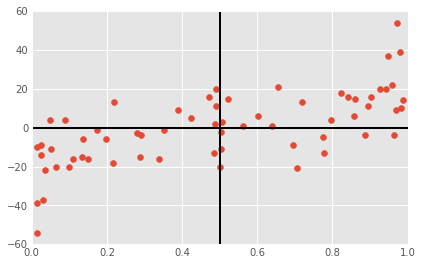

In [152]:
plt.scatter(win_prob,r1_results)
# fig,ax = plt.subplots()
# fig = plt.figure()
plt.plot([0, 1], [0, 0], 'k-', lw=2)
plt.plot([.5,.5], [100, -100], 'k-', lw=2)
plt.xlim(0,1)
plt.ylim(-60,60)
plt.xlabel("Likelihood to win")
plt.ylabel("Winning/losing margin")
plt.title("Favorites win big, but upsets are forever")
# ax = fig.add_subplot(1,1,1)
# fig.sublots_adjust(top = 0.85)
# ax.set_title = "Favorites win big, but upsets are forever"
# ax.set_xlabel("Likelihood to win")
# ax.set_ylabel("Winning/losing margin")
plt.labels = [i for i in school_names]